   CLUSTERING ANALYSIS

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn  as sns

In [ ]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [ ]:
df.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset

In [ ]:
df.notnull().sum()

ID#                  3999
Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64

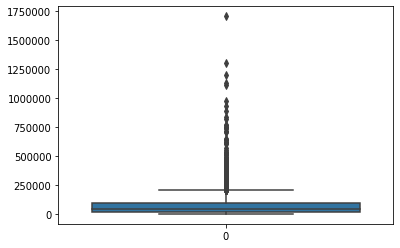

In [ ]:
sns.boxplot(df['Balance'])

In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

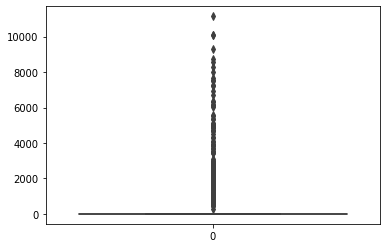

In [ ]:
sns.boxplot(df['Qual_miles'])

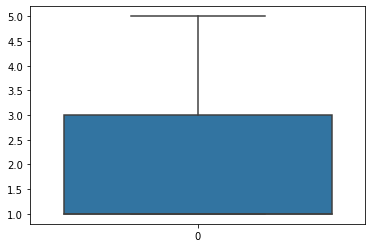

In [ ]:
sns.boxplot(df['cc1_miles'])

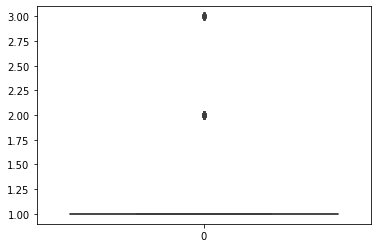

In [ ]:
sns.boxplot(df['cc2_miles'])

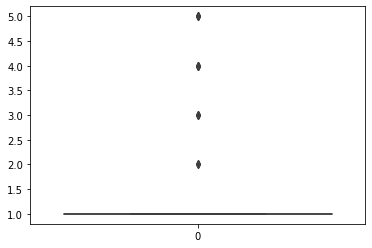

In [ ]:
sns.boxplot(df['cc3_miles'])

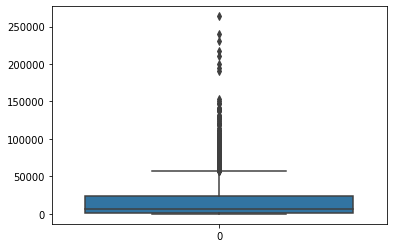

In [ ]:
sns.boxplot(df['Bonus_miles'])

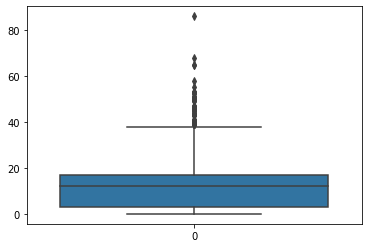

In [ ]:
sns.boxplot(df['Bonus_trans'])

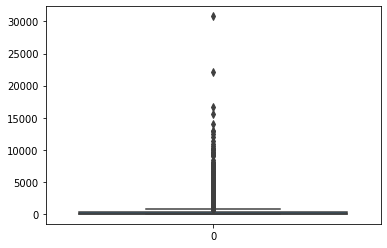

In [ ]:
sns.boxplot(df['Flight_miles_12mo'])

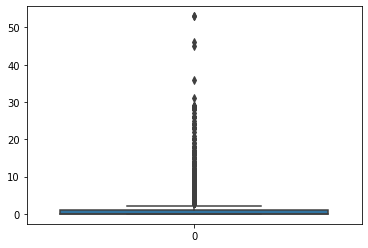

In [ ]:
sns.boxplot(df['Flight_trans_12'])

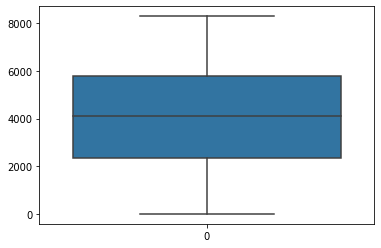

In [ ]:
sns.boxplot(df['Days_since_enroll'])

In [ ]:
df_cat=df.drop(columns=['ID#','Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll'])

In [ ]:
df_scaler = df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?'])

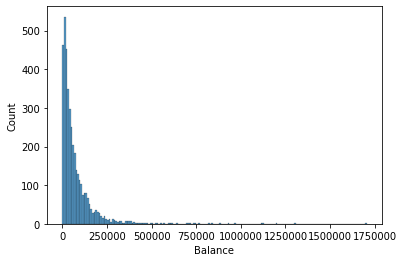

In [ ]:
sns.histplot(df["Balance"])

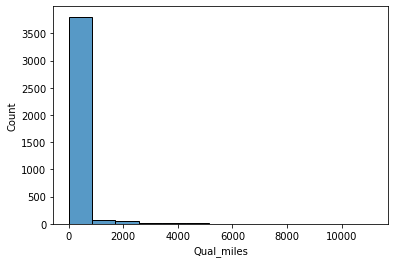

In [ ]:
sns.histplot(df["Qual_miles"])

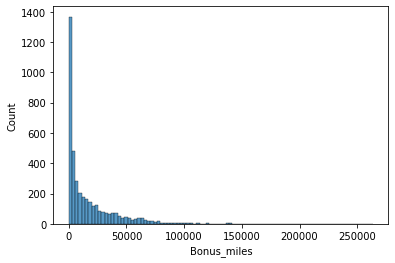

In [ ]:
sns.histplot(df["Bonus_miles"])

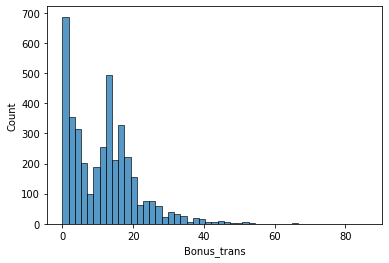

In [ ]:
sns.histplot(df["Bonus_trans"])

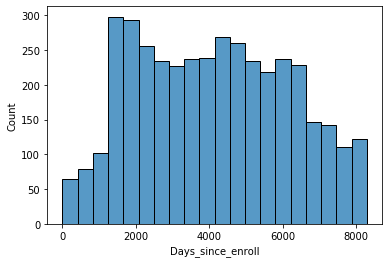

In [ ]:
sns.histplot(df["Days_since_enroll"])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Load the dataset (adjust the path as necessary)
# df = pd.read_csv('your_dataset.csv')

# Assuming df is your dataset with the columns provided earlier.

# 1. Separate categorical and continuous columns
categorical_cols = ['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']
continuous_cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans',
                   'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

# 2. Label encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 3. Standardize continuous columns
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# 4. Combine both categorical and continuous columns
combined_df = df[categorical_cols + continuous_cols]

# 5. Remove outliers using Z-score
# Calculate Z-scores for the combined DataFrame
z_scores = stats.zscore(combined_df)

# Set a threshold for Z-score (e.g., 3 standard deviations away from the mean)
threshold = 3

# Find the rows where any Z-score is greater than the threshold (outlier detection)
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove rows containing outliers
cleaned_df = combined_df[~outliers]

# Print the cleaned DataFrame
print(cleaned_df)


      cc1_miles  cc2_miles  cc3_miles  Award?   Balance  Qual_miles  \
0             0          0          0       0 -0.451141   -0.186299   
1             0          0          0       0 -0.539457   -0.186299   
2             0          0          0       0 -0.320031   -0.186299   
3             0          0          0       0 -0.583799   -0.186299   
4             3          0          0       1  0.239678   -0.186299   
...         ...        ...        ...     ...       ...         ...   
3994          0          0          0       1 -0.547079   -0.186299   
3995          0          0          0       1 -0.091465   -0.186299   
3996          2          0          0       1 -0.000043   -0.186299   
3997          0          0          0       0 -0.185607   -0.186299   
3998          0          0          0       0 -0.700508   -0.186299   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       -0.702786    -1.104065          -0.328603        -0.362168   
1      

In [ ]:
cleaned_df

,cc1_miles,cc2_miles,cc3_miles,Award?,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,0,0,0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,0,0,0,0,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,0,0,0,0,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,0,0,0,0,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,3,0,0,1,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,0,0,1,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,0,0,0,1,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,2,0,0,1,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,0,0,0,0,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [ ]:
cleaned_df.isnull().sum()

cc1_miles            0
cc2_miles            0
cc3_miles            0
Award?               0
Balance              0
Qual_miles           0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# KMeans

In [ ]:
distortions = []
def elbow_method(data):

    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)




elbow_method(cleaned_df)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(cleaned_df)

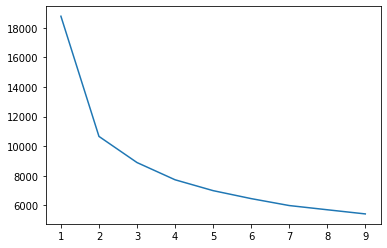

In [ ]:
plt.plot(range(1, 10), distortions)

In [ ]:
# Evaluate K-Means using silhouette score
kmeans_silhouette = silhouette_score(cleaned_df, kmeans_labels)
kmeans_silhouette

0.2655669896754653

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(cleaned_df)
# Evaluate K-Means using silhouette score
kmeans_silhouette = silhouette_score(cleaned_df, kmeans_labels)
kmeans_silhouette

0.2898810252670677

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(cleaned_df)
y_clusters=kmeans_labels
# Evaluate K-Means using silhouette score
kmeans_silhouette = silhouette_score(cleaned_df, kmeans_labels)
kmeans_silhouette

0.41143356436043355

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(cleaned_df)
# Evaluate K-Means using silhouette score
kmeans_silhouette = silhouette_score(cleaned_df, kmeans_labels)
kmeans_silhouette

0.27668128949394855

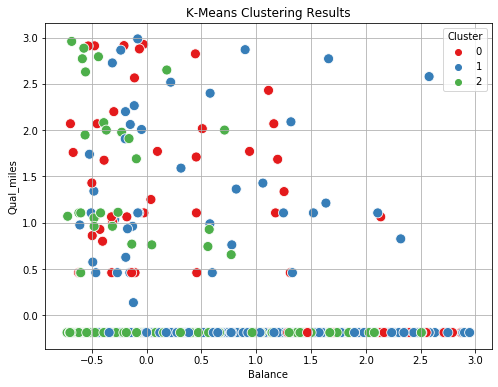

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=cleaned_df['Balance'], y=cleaned_df['Qual_miles'], hue=kmeans_labels, palette="Set1", s=100, marker="o")
plt.title('K-Means Clustering Results')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.legend(title='Cluster')
plt.grid(True)


# Hierarchical Clustering

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = agg_clustering.fit_predict(cleaned_df)
hierarchical_silhouette = silhouette_score(cleaned_df, hierarchical_labels)
hierarchical_silhouette

0.25728691223529704

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
hierarchical_labels = agg_clustering.fit_predict(cleaned_df)
hierarchical_silhouette = silhouette_score(cleaned_df, hierarchical_labels)
hierarchical_silhouette

0.38657600430589856

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical_labels = agg_clustering.fit_predict(cleaned_df)
hierarchical_silhouette = silhouette_score(cleaned_df, hierarchical_labels)
hierarchical_silhouette

0.40443595876075156

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchical_labels = agg_clustering.fit_predict(cleaned_df)
hierarchical_silhouette = silhouette_score(cleaned_df, hierarchical_labels)
hierarchical_silhouette

0.35256923191030926

# DBSCAN Clustering

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=1)
dbscan_labels = dbscan.fit_predict(cleaned_df)
dbscan_silhouette = silhouette_score(cleaned_df, dbscan_labels)
dbscan_silhouette

0.27375234475578714

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=1)
dbscan_labels = dbscan.fit_predict(cleaned_df)
dbscan_silhouette = silhouette_score(cleaned_df,labels)
dbscan_silhouette

0.2658784333654347

In [ ]:
dbscan = DBSCAN(eps=4, min_samples=1)
dbscan_labels = dbscan.fit_predict(cleaned_df)
dbscan_silhouette = silhouette_score(cleaned_df,labels)
dbscan_silhouette

0.2658784333654347

In [ ]:
dbscan = DBSCAN(eps=4, min_samples=2)
dbscan_labels = dbscan.fit_predict(cleaned_df)
dbscan_silhouette = silhouette_score(cleaned_df,labels)
dbscan_silhouette

0.2658784333654347

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(cleaned_df)
dbscan_silhouette = silhouette_score(cleaned_df,labels)
dbscan_silhouette

0.2658784333654347